# Lösungen zum Modul 07 - Der Grover-Algorithmus

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**

In [11]:
run ../content/00-Inhalt_Tools.ipynb

## 4. Übung <a id='problems'></a>

Die Funktion „blackbox_grover_oracle(nqubits)“ gibt für eine Anzahl von Qubits („nqubits“) ein unbekanntes Orakel mit eindeutiger Lösung zurück. 

1. Passen Sie das letzte Beispiel an (mit `initialize_s` und `diffuser`), indem Sie `blackbox_grover_oracle(4)` verwenden

In [12]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [13]:
# initialization
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [14]:
# diffuser
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U_s"
    return U_s

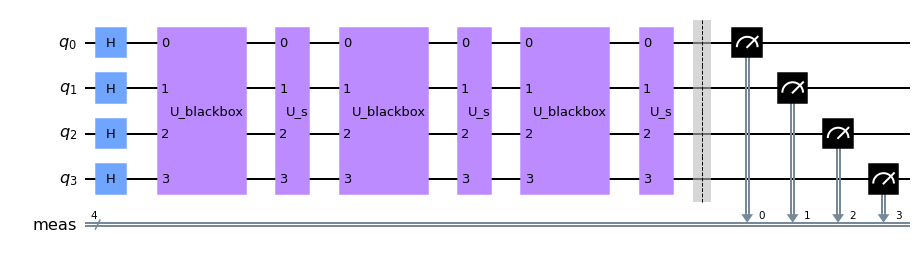

In [15]:
nqubits = 4
iterations = 3

qbit_arr = range(nqubits)
grover_circuit = QuantumCircuit(nqubits)
grover_circuit = initialize_s(grover_circuit, qbit_arr)
oracle = blackbox_grover_oracle(nqubits)
diffuser_gate = diffuser(nqubits)

for i in range(iterations):
    grover_circuit.append(oracle, qbit_arr)
    grover_circuit.append(diffuser_gate, qbit_arr)

grover_circuit.measure_all()
grover_circuit.draw("mpl")

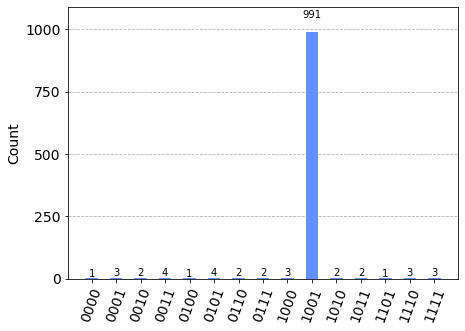

In [16]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

2. Passen Sie Ihr letztes Listing an und erstellen Sie eine Funktion, `grover_solver(nqubits, iterations)`, bei der folgende Parameter als Eingabe verwendet werden:
    - Die Anzahl von Qubits (`nqubits`)
    - Eine ganze Zahl von Iterationen (`iterations`)
    
    und gibt einen „QuantumCircuit“ zurück, der den Grover-Algorithmus auf dem „Orakel“-Gatter `blackbox_grover_oracle(nqubits)` mit „iterations“-Iterationen ausführt.
    
3. Geben Sie sich mit Hilfe dieser Funktion das Histogram nach diversen Grover-Iterationen aus. Überprüfen Sie Ihre Aussage von 1c.

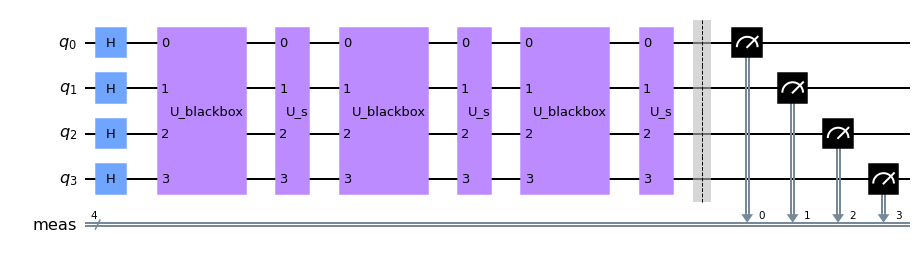

In [17]:
# Muss im Notebook der Session ausgeführt werden (wg. initialize_s und diffuser)

def grover_solver(nqubits, iterations):
    qbit_arr = range(nqubits)
    grover_circuit = QuantumCircuit(nqubits)
    grover_circuit = initialize_s(grover_circuit, qbit_arr)
    oracle = blackbox_grover_oracle(nqubits)
    diffuser_gate = diffuser(nqubits)
    
    for i in range(iterations):
        grover_circuit.append(oracle, qbit_arr)
        grover_circuit.append(diffuser_gate, qbit_arr)

    grover_circuit.measure_all()
    return grover_circuit

grover_circuit = grover_solver(nqubits=4, iterations=3)

# Evtl. in eigener Notebook-cell ausführen:
grover_circuit.draw("mpl")

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()

counts = results.get_counts()

grover_circuit.draw("mpl")

[('1001', 984), ('0111', 5), ('0001', 4), ('1011', 3), ('0000', 3), ('0010', 3), ('0011', 3), ('1100', 3), ('0100', 3), ('1110', 3), ('1000', 3), ('0101', 3), ('1101', 2), ('1010', 1), ('1111', 1)]


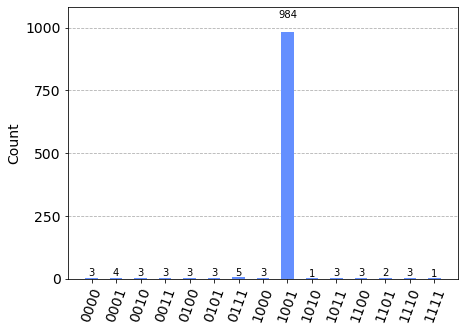

In [18]:
# Muss im Notebook der Session ausgeführt werden (wg. initialize_s und diffuser)

# Falls es zuviele Werte gibt, dann per sortierter Liste:
counts_sorted = sorted(counts.items(), key=lambda x:x[1], reverse=True)
print(counts_sorted)

# Ansonsten als Histogramm
plot_histogram(counts)